### 머신러닝에서 사용되는 전처리 기법

In [1]:
### 데이터 준비하기
# - 어제 사용한 도미와 빙어 데이터

In [5]:
import numpy as np

In [4]:
# - 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

# - 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# - 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# - 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 도미와 빙어의 길이 데이터 합치기
length = bream_length + smelt_length
# 도미와 빙어의 무게 데이터 합치기
weight = bream_weight + smelt_weight

fish_data = [[leng, wei] for leng, wei in zip(length, weight)]

In [3]:
# 정답변수
fish_target = [1]*35 + [0]*14

In [6]:
### numpy가 제공하는 함수를 이용한 2차원 데이터 생성하기
# 샘플
a = [1,2,3]
b = [4,5,6]
np.column_stack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

- numpy 함수 사용

In [7]:
fish_data = np.column_stack((length, weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [16]:
###
print(np.ones(5))
print(np.zeros(5))

print(np.concatenate((np.ones(5),np.zeros(5))))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [18]:
### Numpy를 이용해서 1과 0의 임의 값 만들기
# - 튜플 형태로 만들어야 함
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 훈련데이터세트와 테스트데이터세트 만들기
##### - 훈련데이터세트 : 독립변수의 훈련데이터와 target 데이터 생성
##### - 테스트데이터세트 : 독립변수의 테스트데이터와 target 데이터 생성

##### - train_data, train_target : 훈련에 사용
##### - test_data, test_target : 평가 및 예측에 사용

In [21]:
input_arr = np.array(fish_data)
target_arr =np.array(fish_target)

# 넘파이 배열에서는 차원 확인이 가능
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


In [22]:
### 넘파이 shuffle() 함수를 이용해서 배열(리스트) 데이터 섞기

np.random.seed(42)
# 0~48까지의 순차적인 번호 생성하기
index = np.arange(49)
print('(섞기 전)index = ', index)
print('---------------------------')

# 0~48까지의 순차적인 번호를 섞기
# 아직 데이터는 그대로
np.random.shuffle(index)
print('(섞은 후)index = ', index)


(섞기 전)index =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
---------------------------
(섞은 후)index =  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [23]:
## 훈련데이터 생성하기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(train_input)
print('------------------------')
print(train_target)


[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
------------------------
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]


In [24]:
## 테스트데이터 생성하기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(test_input)
print('------------------------')
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
------------------------
[0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


---------------------

In [25]:
### 사이킷런 패키지에는 훈련 및 테스트 데이터를 자동으로 섞어주는 함수있음
# - train_test_split() 함수 : 섞어주기, 비율로 나누기

In [26]:
# 함수 사용을 위해 불러오기
from sklearn.model_selection import train_test_split

In [54]:
# 훈련 및 테스트데이터 분류하여 가지고 오기
# 총 4개의 변수값을 반환해 줍니다

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

### 훈련과 테스트 데이터와 구분 비율 확인하기
# - 구분 비율은 훈련input과 테스트input으로 체크
# test_size : 테스트데이터 비율
# train_size : 훈련데이터 비율
# 기본적으로 train:test = 75 : 25 비율 사용
# (대략적인 비율)
# 일반적으로 훈련과 테스트 비율은 7:3 또는 7.5 : 2.5
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size = 0.25, random_state=42)

print(len(train_input) / (len(train_input) + len(test_input)))
print(len(test_input) / (len(train_input) + len(test_input)))

0.7346938775510204
0.2653061224489796


In [48]:
print(train_input)
print("-----------------------")
print(test_input)
print("-----------------------")
print(train_target)
print("-----------------------")
print(test_target)

[[  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
-----------------------
[[ 32.  340. ]
 [ 12.4  13.4]
 [ 14.3  19.7]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 36.  714. ]
 [ 35.  720. ]
 [ 35.  725. ]
 [ 38.5 955. ]
 [ 33.5 650. ]
 [ 31.5 500. ]
 [ 29.  430. ]
 [ 41.  950. ]]
-----------------------
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
-----------------------
[1. 0. 0

In [51]:
# 훈련데이터 차원 확인
print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [55]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
### 샘플링 편향을 최소화 하기 위한 방법으로
# - stratify 속성 사용
# - 속성에는 기준값을 넣는다(보통 종속데이터)
# - 종속데이터의 분류 값을 기준으로 test_size의 비율로 섞어줌
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target,
                                                                      test_size = 0.25, random_state=42)


In [60]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [68]:
test_input

array([[ 11. ,   9.7],
       [ 11.8,   9.9],
       [ 29.7, 450. ],
       [ 11.8,  10. ],
       [ 26.5, 340. ],
       [ 12.4,  13.4],
       [ 34. , 685. ],
       [ 34. , 575. ],
       [ 38.5, 920. ],
       [ 35. , 680. ],
       [ 26.3, 290. ],
       [ 31. , 500. ],
       [ 41. , 950. ]])

### 특정 위치의 생선 예측하기
##### - 특정 위치의 생선 : 예측 데이터1개 사용

In [ ]:
### [문제]
# - 생선의 길이와 무게가 25cm, 150g
# - 이 생선은 도미? 빙어?
# 1. 훈련데이터를 산점도로 시각화하여 대략 위의 생선의 위치를 눈으로 확인
# 2. 모델 객체 생성 > 3. 훈련데이터 학습 > 4. 정확도 확인 > 5. 위의 생선 예측
# 6. 산점도 그래프 시각화
#    (훈련데이터에 대한 산점도와 위 생선 한개 위치까지 포함)

In [65]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'weigth')

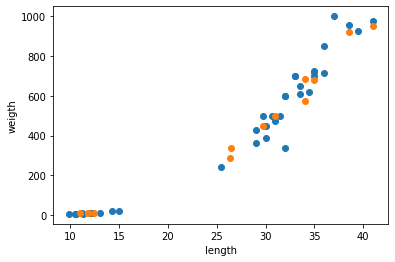

In [73]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])

plt.xlabel('length')
plt.ylabel('weigth')

In [66]:
kn =KNeighborsClassifier()
kn

KNeighborsClassifier()

In [74]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [75]:
kn.score(test_input, test_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [76]:
# 위 생선 예측
kn.predict([[25, 150]])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0.])

Text(0, 0.5, 'weigth')

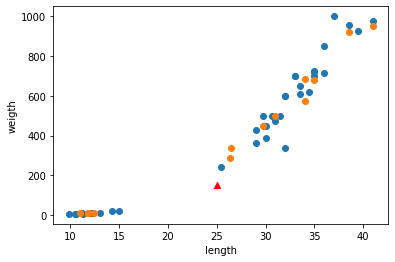

In [77]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(25, 150, marker='^', c ='red')

plt.xlabel('length')
plt.ylabel('weigth')

- 강사님

In [ ]:
### 클래스 객체 생성
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

### 훈련시키기
kn.fit(train_input, train_target)

### 정확도 확인
kn.score(test_input, test_target)

### 특정값 넣어 예측
kn.predict([[25, 150]])

Text(0, 0.5, 'weigth')

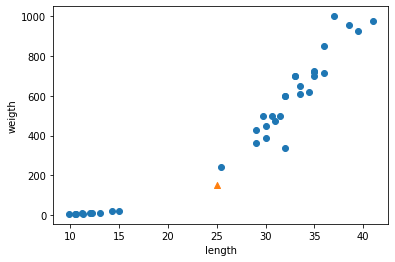

In [85]:
### 산점도
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')

plt.xlabel('length')
plt.ylabel('weigth')

In [ ]:
### 눈으로 확인하면 도미같은데 예측결과는 빙어로 나옴
### 왜 이렇게 나왔는지 확인

In [87]:
### 사용된 이웃값 확인하기
# - 모델 생성시 기본 5개의 이웃으로 지정되어 훈련 됨
# - 이웃 5개의 값을 추출하기 위해서는 kneighbors() 함수 사용
# - kneighbors()함수의 반환값은 2개
# - 첫번째 값 : 특정 생선과 이웃과의 거리
# - 두번째 값 : 이웃 5개의 실제 위치(인덱스 번호)
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


Text(0, 0.5, 'weigth')

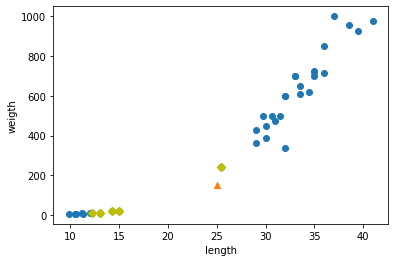

In [92]:
### 산점도
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1] , marker = 'D',c='y')


plt.xlabel('length')
plt.ylabel('weigth')

In [93]:
### (해석)
# - x축의 범위와 y 축의 범위가 너무 큰 차이로 나타난 현상
# - x축의 범위 : 10 ~ 40
# - y축의 범위 : 0 ~ 1000
# - 두 축의 범위 값이 너무 크게 차이가 나서 발생
# - y축으로 조금만 올라가도 거리는 크게 벌어집니다
# - 도미들의 위치가 위로 조금만 올라가도 거리는 크게 벌어집니다.

# - 이런 현상을 "스케일이 다르다"라고 해석합니다.
# - 분석 시 매우 흔하게 발생하는 현상으로 전처리를 꼭 해주어야 합니다.
# - 전처리 방법 : x축과 y축의 값을 동일하게 맞춰줘야 함

Text(0, 0.5, 'weigth')

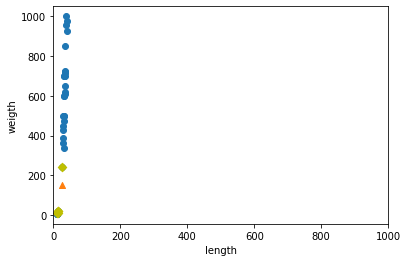

In [95]:
### 산점도
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1] , marker = 'D',c='y')

# x축의 범위를 y축과 동일하게 임의로 정하기
plt.xlim((0, 1000))

plt.xlabel('length')
plt.ylabel('weigth')

### 스케일 동일하게 맞추기(전처리)
##### - 스케일을 맞추는 전처리 방법으로는 "표준점수(standard score)"를 사용
##### - 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차 만큼 떨어져 있는지를 나타내는 값
##### - 표준점수 계산공식
#####    =  (각 데이터값 - 데이터세트 전체평균값) / 데이터세트 전체 표준편차값
##### - 평균, 표준편차 계산은 모두 넘파이(Numpy)에서 제공하는 함수 사용

In [97]:
# 훈련데이터 전체 평균 구하기
mean = np.mean(train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [99]:
# 훈련데이터 전체 표준편차 구하기
std = np.std(train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [108]:
# 표준점수 데이터 계신해서 훈련데이터 재생성
train_scaled = (train_input - mean) / std
len(train_scaled)

36

### 스케일로 훈련데이터 재생성 후에는 훈련모델도 재생성

Text(0, 0.5, 'weigth')

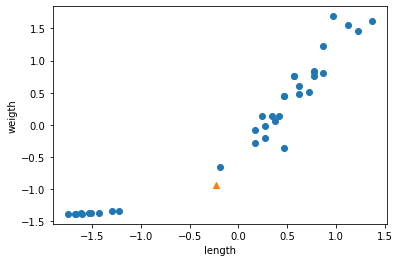

In [107]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')

plt.xlabel('length')
plt.ylabel('weigth')

### (해석)
# - 훈련데이터는 스케일을 맞췃으나 예측데이터는 스케일을 맞추지 못해 발생한 현상
# - 예측데이터 한개도 스케일 작업을 해야함
# -- 한개의 예측데이터 스케일 작업은 훈련데이터를 사용하여 계산된 평균과 표준편차 값을 사용해야 함

In [122]:
# 예측데이터 스케일 작업하기
new = ([25, 150] - mean) / std
print(new)

[-0.23012627 -0.94060693]


### [문제]
##### - 직접 훈련 > 검증 > 테스트 > 산점도 그리기(이웃까지 포함)

In [113]:
# 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [129]:
# 테스트데이터스테일링
mean2 = np.mean(test_input, axis=0)

std2 = np.std(test_input, axis=0)

test_scaled = (test_input - mean2) / std2
test_scaled

array([[-1.46146049, -1.24696824],
       [-1.38546454, -1.24635731],
       [ 0.31494474,  0.09798296],
       [-1.38546454, -1.24605185],
       [ 0.01096095, -0.23802574],
       [-1.32846758, -1.23566612],
       [ 0.72342294,  0.81581973],
       [ 0.72342294,  0.47981103],
       [ 1.15090013,  1.5336565 ],
       [ 0.81841787,  0.8005466 ],
       [-0.00803803, -0.39075697],
       [ 0.43843815,  0.25071418],
       [ 1.38838746,  1.62529523]])

In [118]:
# 검증
kn.score(test_scaled, test_target)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [123]:
# 예측
# predict에는 무조건 이차원 들어가야 함
kn.predict([new])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1.])

In [124]:
distances, indexes = kn.kneighbors([new])
print(distances)
print(indexes)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
[[21 14 34 32  5]]


Text(0, 0.5, 'weigth')

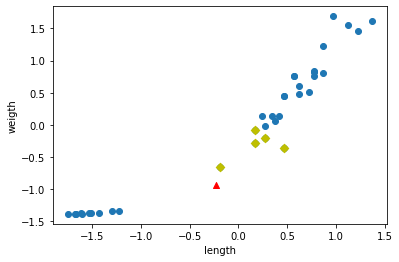

In [128]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
# plt.scatter(test_scaled[:, 0], test_scaled[:,1])
plt.scatter(new[0], new[1], marker='^', c='red')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1] , marker = 'D',c='y')


plt.xlabel('length')
plt.ylabel('weigth')